In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from estimation import sampling
np.random.seed(0)

# #1

### Generate 1,000 samples having normal distribution with a mean of 100 and a variance of 4

In [2]:
data = np.round_(np.random.normal(loc = 100, scale = 2, size = 1000), 1)
pd.DataFrame(data,columns = ['value'])

,value
0,103.5
1,100.8
2,102.0
3,104.5
4,103.7
...,...
995,100.8
996,99.6
997,100.2
998,97.7


In [3]:
print(f'min: {np.min(data)}')
print(f'max: {np.max(data)}')

min: 93.9
max: 105.5


Drawing graph

In [4]:
uniq, counts = np.unique(data, return_counts=True)

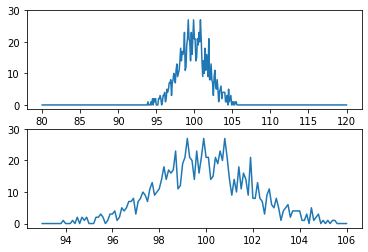

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x1 = np.arange(80, 120.1, 0.1)
y1 = np.zeros(401, dtype=int)
for i in range(len(uniq)):
    y1[int(uniq[i]*10-800)] = counts[i]

x2 = np.arange(93, 106.1, 0.1)
y2 = np.zeros(131, dtype=int)
for i in range(len(uniq)):
    y2[int(uniq[i]*10-930)] = counts[i]

ax1.plot(x1,y1)
ax1.set_yticks(np.arange(0, 31, 10))
ax2.plot(x2,y2)
ax2.set_yticks(np.arange(0, 31, 10))
plt.show()

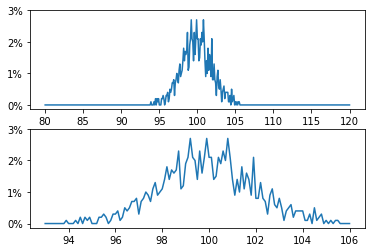

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(x1, y1/10)
ax1.set_yticks(np.arange(4))
ax1.set_yticklabels(['0%', '1%', '2%', '3%'])
ax2.plot(x2, y2/10)
ax2.set_yticks(np.arange(4))
ax2.set_yticklabels(['0%', '1%', '2%', '3%'])
plt.show()

# #2

# <div align="center"><b>Single population</b></div>
### <div align="center"><b> Estimate mean in sample distribution</b></div>
$$ \overline{X} = \frac{1}{n}\sum_{i=1}^{n}X_i $$
### <div align="center"><b> Estimate variance in sample distribution</b></div>
$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2 $$
### <div align="center"><b> Using sample distribution, Estimate population mean with 95% confidence interval </b></div>
$$ \overline{x} - z_{0.025}\frac{\sigma}{\sqrt{n}} < \mu < \overline{x} + z_{0.025}\frac{\sigma}{\sqrt{n}} $$
### <div align="center"><b> Using sample distribution, Estimate population variance with 95% confidence interval </b></div>
$$ \frac{(n-1)s^2}{\chi_{0.025}^2} < \sigma^2 < \frac{(n-1)s^2}{\chi_{1-0.025}^2} $$
### <div align="center"><b> Estimate population mean without knowing population variance </b></div>
$$ \overline{x} - t_{0.025}\frac{s}{\sqrt{n}} < \mu < \overline{x} + t_{0.025}\frac{s}{\sqrt{n}} $$

### population mean and variance

In [7]:
population_var = 4

#### Randomly sample 10 samples from population

In [8]:
samples_10_1 = sampling(data, 10)
print(samples_10_1)

samples_10_1.estimate_population_mean_and_variance(population_var)
samples_10_1.estimate_population_mean_t_distribution()

Randomly sample 10 samples from population : 100.5, 98.0, 100.8, 101.6, 100.7, 95.5, 100.1, 100.7, 101.3, 97.4

Estimate mean in sample distribution: 99.7
Estimate variance in sample distribution: 4.0

Using sample distribution,Estimate population mean with 95% confidence interval : 98.46 < μ < 100.94
Using sample distribution, Estimate population variance with 95% confidence interval : 1.89 < σ^2 < 13.33
Estimate population mean with 95% confidence interval in t-distribution : 98.15 < μ < 101.25


$$ \overline{X} = 99.7 \:, \:\: S^2 = 4.0 $$  
  
$$ 98.46 < \mu < 100.94 $$  

$$ 1.89 < \sigma^2 < 13.33 $$  

$$ 98.15 < \mu < 101.25 $$

#### Randomly sample 30 samples from population

In [9]:
samples_30_1 = sampling(data, 30)
print(samples_30_1)

samples_30_1.estimate_population_mean_and_variance(population_var)
samples_30_1.estimate_population_mean_t_distribution()

Randomly sample 30 samples from population : 99.0, 102.2, 99.8, 98.0, 97.9, 99.0, 100.6, 101.0, 100.2, 99.4, 98.5, 100.0, 104.1, 100.6, 100.5, 99.5, 95.9, 102.7, 103.5, 100.9, 102.5, 101.9, 99.8, 100.2, 98.9, 99.8, 97.3, 99.2, 100.7, 97.9

Estimate mean in sample distribution: 100.0
Estimate variance in sample distribution: 3.38

Using sample distribution,Estimate population mean with 95% confidence interval : 99.28 < μ < 100.72
Using sample distribution, Estimate population variance with 95% confidence interval : 2.14 < σ^2 < 6.11
Estimate population mean with 95% confidence interval in t-distribution : 99.18 < μ < 100.82


$$ \overline{X} = 100.0 \:, \:\: S^2 = 3.38 $$  
  
$$ 99.28 < \mu < 100.72 $$  

$$ 2.14 < \sigma^2 < 6.11 $$  

$$ 99.18 < \mu < 100.82 $$

#### Randomly sample 61 samples from population

In [10]:
samples_61_1 = sampling(data, 61)
print(samples_61_1)

samples_61_1.estimate_population_mean_and_variance(population_var)
samples_61_1.estimate_population_mean_t_distribution()

Randomly sample 61 samples from population : 100.9, 102.4, 97.8, 103.0, 101.7, 98.6, 98.8, 100.8, 94.7, 100.2, 100.9, 98.8, 99.6, 100.7, 98.2, 102.4, 102.0, 102.7, 99.8, 102.6, 100.8, 100.8, 97.7, 99.2, 98.1, 99.5, 103.5, 103.9, 98.7, 99.0, 102.5, 99.9, 98.8, 98.7, 101.4, 99.9, 95.9, 99.9, 97.7, 96.1, 98.7, 98.3, 98.2, 98.6, 100.8, 101.0, 103.5, 98.8, 100.4, 100.1, 98.6, 101.0, 100.7, 96.7, 101.2, 97.6, 97.8, 97.7, 104.5, 100.9, 100.9

Estimate mean in sample distribution: 99.9
Estimate variance in sample distribution: 4.23

Using sample distribution,Estimate population mean with 95% confidence interval : 99.4 < μ < 100.4
Using sample distribution, Estimate population variance with 95% confidence interval : 3.05 < σ^2 < 6.27
Estimate population mean with 95% confidence interval in t-distribution : 99.26 < μ < 100.54


$$ \overline{X} = 99.9 \:, \:\: S^2 = 4.23 $$  
  
$$ 99.4 < \mu < 100.4 $$  

$$ 3.05 < \sigma^2 < 6.27 $$  

$$ 99.26 < \mu < 100.54 $$

## Repeat #2

In [11]:
samples_10_2 = sampling(data, 10)
print(samples_10_2)

samples_10_2.estimate_population_mean_and_variance(population_var)
samples_10_2.estimate_population_mean_t_distribution()

Randomly sample 10 samples from population : 96.6, 99.7, 104.5, 98.7, 102.2, 98.3, 101.2, 103.3, 97.1, 98.7

Estimate mean in sample distribution: 100.0
Estimate variance in sample distribution: 7.08

Using sample distribution,Estimate population mean with 95% confidence interval : 98.76 < μ < 101.24
Using sample distribution, Estimate population variance with 95% confidence interval : 3.35 < σ^2 < 23.6
Estimate population mean with 95% confidence interval in t-distribution : 97.94 < μ < 102.06


$$ \overline{X} = 100.0 \:, \:\: S^2 = 7.08 $$  
  
$$ 98.76 < \mu < 101.24 $$  

$$ 3.35 < \sigma^2 < 23.6 $$  

$$ 97.94 < \mu < 102.06 $$

In [12]:
samples_30_2 = sampling(data, 30)
print(samples_30_2)

samples_30_2.estimate_population_mean_and_variance(population_var)
samples_30_2.estimate_population_mean_t_distribution()

Randomly sample 30 samples from population : 96.9, 97.9, 101.1, 98.5, 100.7, 97.7, 97.1, 98.7, 103.9, 101.8, 99.6, 101.2, 103.5, 101.7, 101.7, 99.1, 98.7, 103.9, 94.3, 99.9, 96.9, 99.1, 98.0, 99.9, 99.5, 99.6, 97.7, 99.8, 101.9, 98.0

Estimate mean in sample distribution: 99.6
Estimate variance in sample distribution: 5.0

Using sample distribution,Estimate population mean with 95% confidence interval : 98.88 < μ < 100.32
Using sample distribution, Estimate population variance with 95% confidence interval : 3.17 < σ^2 < 9.04
Estimate population mean with 95% confidence interval in t-distribution : 98.6 < μ < 100.6


$$ \overline{X} = 99.6 \:, \:\: S^2 = 5.0 $$  
  
$$ 98.88 < \mu < 100.32 $$  

$$ 3.17 < \sigma^2 < 9.04 $$  

$$ 98.6 < \mu < 100.6 $$

In [13]:
samples_61_2 = sampling(data, 61)
print(samples_61_2)

samples_61_2.estimate_population_mean_and_variance(population_var)
samples_61_2.estimate_population_mean_t_distribution()

Randomly sample 61 samples from population : 100.6, 100.0, 100.1, 100.0, 99.3, 100.1, 99.5, 99.3, 100.4, 97.8, 101.4, 103.1, 98.5, 97.1, 98.1, 97.5, 98.8, 103.0, 99.8, 99.8, 103.1, 102.7, 100.9, 98.4, 99.6, 97.1, 100.0, 100.8, 99.7, 101.3, 96.5, 99.9, 95.4, 98.0, 99.7, 102.1, 100.3, 101.4, 99.6, 101.1, 98.6, 101.5, 101.8, 100.8, 103.7, 101.4, 100.3, 99.8, 100.0, 101.3, 100.3, 97.4, 98.7, 103.0, 104.0, 103.3, 98.4, 101.4, 103.5, 100.3, 99.5

Estimate mean in sample distribution: 100.2
Estimate variance in sample distribution: 3.52

Using sample distribution,Estimate population mean with 95% confidence interval : 99.7 < μ < 100.7
Using sample distribution, Estimate population variance with 95% confidence interval : 2.54 < σ^2 < 5.22
Estimate population mean with 95% confidence interval in t-distribution : 99.61 < μ < 100.79


$$ \overline{X} = 100.2 \:, \:\: S^2 = 3.52 $$  
  
$$ 99.7 < \mu < 100.7 $$  

$$ 2.54 < \sigma^2 < 5.22 $$  

$$ 99.61 < \mu < 100.79 $$